# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


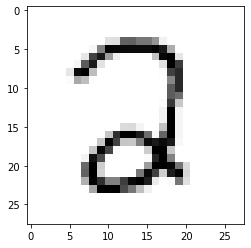

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2516213076254313
train accuracy is: 0.7186613253213153, test accuracy is 0.7590725806451613


Epoch 10 Loss 0.06122109386707327
train accuracy is: 0.9340677683191454, test accuracy is 0.9501008064516129


Epoch 20 Loss 0.0431749129732611
train accuracy is: 0.9522617259222167, test accuracy is 0.9621975806451613


Epoch 30 Loss 0.03586046228081718
train accuracy is: 0.9596060757803372, test accuracy is 0.9672379032258065


Epoch 40 Loss 0.03179289347357573
train accuracy is: 0.9638624603572025, test accuracy is 0.969758064516129


Epoch 50 Loss 0.029113115894940846
train accuracy is: 0.9670338841595727, test accuracy is 0.9702620967741935


Epoch 60 Loss 0.027178496314160392
train accuracy is: 0.9695376397930229, test accuracy is 0.9702620967741935


Epoch 70 Loss 0.025671202325864177
train accuracy is: 0.9706226005675179, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.024454337000629003
train accuracy is: 0.9725421465531631, test accuracy is 0.9707661290322581


Epoch 90 Loss 0.0234219675188627
train accuracy is: 0.9739609414121182, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.022531787425972002
train accuracy is: 0.9745451510599232, test accuracy is 0.9702620967741935


Epoch 110 Loss 0.021721605093358447
train accuracy is: 0.9756301118344183, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.0210092206648488
train accuracy is: 0.9760474044399933, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.020349408790558722
train accuracy is: 0.9767985311300283, test accuracy is 0.9737903225806451


Epoch 140 Loss 0.01975893603554114
train accuracy is: 0.9772992822567184, test accuracy is 0.9742943548387096


Epoch 150 Loss 0.01920274480802368
train accuracy is: 0.9784677015523285, test accuracy is 0.9747983870967742


Epoch 160 Loss 0.018685884322220698
train accuracy is: 0.9789684526790186, test accuracy is 0.9753024193548387


Epoch 170 Loss 0.0181980832971608
train accuracy is: 0.9795526623268236, test accuracy is 0.9758064516129032


Epoch 180 Loss 0.017735921072226365
train accuracy is: 0.9802203304957436, test accuracy is 0.9747983870967742


Epoch 190 Loss 0.017287166462127405
train accuracy is: 0.9808045401435487, test accuracy is 0.9753024193548387


Epoch 200 Loss 0.01685464009038728
train accuracy is: 0.9815556668335838, test accuracy is 0.9763104838709677


Epoch 210 Loss 0.01644263422151938
train accuracy is: 0.9820564179602738, test accuracy is 0.9768145161290323


Epoch 220 Loss 0.016037020012345662
train accuracy is: 0.9827240861291938, test accuracy is 0.9773185483870968


Epoch 230 Loss 0.015650320417040103
train accuracy is: 0.9831413787347688, test accuracy is 0.9778225806451613


Epoch 240 Loss 0.015274709583052755
train accuracy is: 0.9833917542981139, test accuracy is 0.9778225806451613


0.06106155884215544

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23873781707131936
train accuracy is: 0.6897846770155233, test accuracy is 0.7076612903225806


Epoch 10 Loss 0.10280345813419833
train accuracy is: 0.9073610415623435, test accuracy is 0.922883064516129


Epoch 20 Loss 0.07922702644789856
train accuracy is: 0.9256384576865297, test accuracy is 0.938508064516129


Epoch 30 Loss 0.06831440700525887
train accuracy is: 0.9355700216992154, test accuracy is 0.9455645161290323


Epoch 40 Loss 0.061753573187229495
train accuracy is: 0.9405775329661158, test accuracy is 0.9490927419354839


Epoch 50 Loss 0.05728039799960177
train accuracy is: 0.942914371557336, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05399633784137408
train accuracy is: 0.9460857953597063, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.05145778560856766
train accuracy is: 0.9480053413453514, test accuracy is 0.9621975806451613


Epoch 80 Loss 0.04942214975771835
train accuracy is: 0.9496745117676515, test accuracy is 0.9627016129032258


Epoch 90 Loss 0.04774238510508044
train accuracy is: 0.9515940577532966, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04632755740586972
train accuracy is: 0.9520948088799867, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.045112090019010995
train accuracy is: 0.9532632281755967, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.04405407643271064
train accuracy is: 0.9537639793022867, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04312035431312753
train accuracy is: 0.9545151059923218, test accuracy is 0.9647177419354839


Epoch 140 Loss 0.04229004947141395
train accuracy is: 0.9551827741612419, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04154383185543931
train accuracy is: 0.9557669838090469, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.040868666122589555
train accuracy is: 0.956100817893507, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.04025302169599055
train accuracy is: 0.956434651977967, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.03968921390855249
train accuracy is: 0.956935403104657, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03916921494510687
train accuracy is: 0.957603071273577, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038688306801099505
train accuracy is: 0.9582707394424971, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.038242103861680504
train accuracy is: 0.9588549490903021, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03782591349950149
train accuracy is: 0.9589384076114171, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.037436324678522565
train accuracy is: 0.9594391587381071, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03707102736878804
train accuracy is: 0.9598564513436821, test accuracy is 0.9662298387096774


0.03441369962518442

### Comparing results of NN and LR

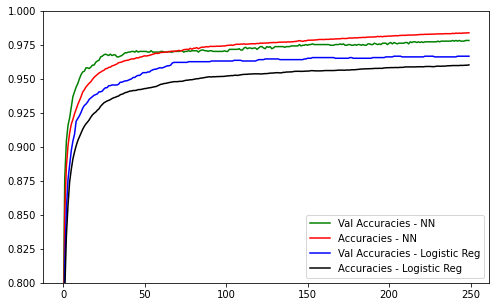

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

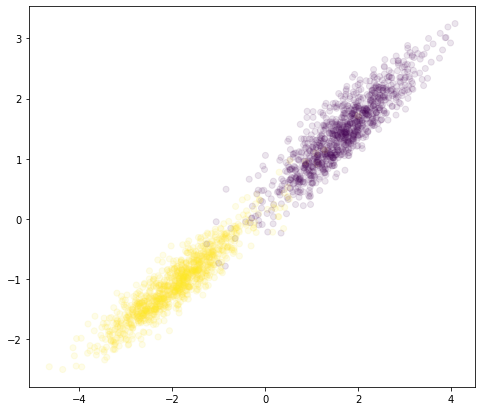

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

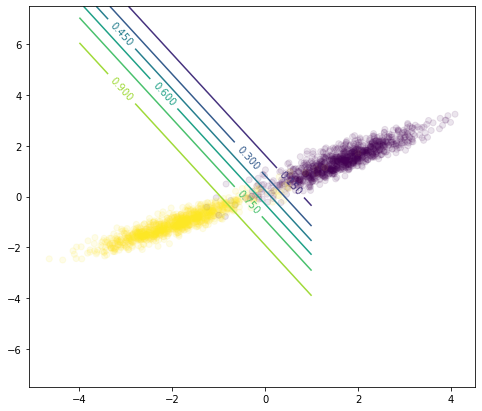

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );